In [1]:
# Χρησιμοποίεισαι αυτό τον κώδικα για μικρά time frames σε crypto (Binance API source)
# Για Daily δεδομενα γράψε κώδικα με yahoofinance library
import pandas as pd
from binance.client import Client
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
client = Client()

In [3]:
info = client.get_exchange_info()

In [4]:
symbols=[x['symbol']for x in info['symbols']]

In [5]:
list=[symbol for symbol in symbols if symbol.endswith('USDT')]

In [6]:
def getdailydata(symbol):
#     Αν θέλεις να παρεις δεδομένα απο το 2017 μέχρι σήμερα χρησιμοποιείς το πρώτο
#     Αν θέλεις συγκεκριμένο timeline χρησιμοποιείς το δεύτερο

#     frame=pd.DataFrame(client.get_historical_klines(symbol,
#                                                    '1d','1 JAN 2011'))
    frame = pd.DataFrame(client.get_historical_klines(symbol, Client.KLINE_INTERVAL_1HOUR,
                                          "1 Oct, 2022", "15 Oct, 2022"))
    if len(frame)> 0:
        frame=frame.iloc[:,:5]
        frame.columns=['Time','Open','High','Low','Close']
        frame=frame.set_index('Time')
        frame.index=pd.to_datetime(frame.index,unit='ms')
        frame=frame.astype(float)
        return frame

In [7]:
# getdailydata('BTCUSDT')

In [8]:
exclude = ['UP','DOWN','BEAR','BULL']

In [9]:
non_lev = [symbol for symbol in list if all(
excludes not in symbol for excludes in exclude)]

In [10]:
# non_lev

In [11]:
list = ['BTCUSDT','ETHUSDT','DOGEUSDT','XRPUSDT','XMRUSDT','DASHUSDT','NEOUSDT','LTCUSDT',
         'XLMUSDT','ETCUSDT','ZECUSDT','FILUSDT']

In [12]:
dfs=[]
for coin in list:
     dfs.append(getdailydata(coin))

In [13]:
mergeddf = pd.concat(dict(zip(list,dfs)), axis=1)

In [14]:
closesdf = mergeddf.loc[:,mergeddf.columns.get_level_values(1).isin(['Close'])]

In [29]:
closesdf

,BTCUSDT,ETHUSDT,DOGEUSDT,XRPUSDT,XMRUSDT,DASHUSDT,NEOUSDT,LTCUSDT,XLMUSDT,ETCUSDT,ZECUSDT,FILUSDT
Time,,,,,,,,,,,,
2022-10-14 20:00:00,19175.65,1300.93,0.05867,0.4892,140.5,40.14,7.76,51.35,0.1126,23.36,49.9,5.05
2022-10-14 21:00:00,19107.94,1292.15,0.05826,0.4820,140.0,39.69,7.69,51.08,0.1113,22.95,49.6,5.01
2022-10-14 22:00:00,19159.83,1295.78,0.05858,0.4886,140.4,39.97,7.72,51.38,0.1117,23.04,49.8,5.05
2022-10-14 23:00:00,19176.93,1296.27,0.05866,0.4883,140.6,40.22,7.74,51.31,0.1125,23.14,50.1,5.07
2022-10-15 00:00:00,19200.86,1295.97,0.05868,0.4871,141.1,40.16,7.75,51.26,0.1124,23.13,49.8,5.06


In [16]:
# Άλλη λίστα είναι η διαφορά εδω χρησιμοποιείς την relevant αντι 
# την list που έχεις φτιάξει παραπάνω

# dfs= []

# for coin in relevant:
#     dfs.append(getdailydata(coin))

In [17]:
# mergeddf = pd.concat(dict(zip(relevant,dfs)), axis=1)

In [18]:
# closesdf = mergeddf.loc[:,mergeddf.columns.get_level_values(1).isin(['Close'])]

In [19]:
# closesdf

In [20]:
closesdf.columns=closesdf.columns.droplevel(1)

In [21]:
logretdf=np.log(closesdf.pct_change() +1)

In [22]:
logretdf

,BTCUSDT,ETHUSDT,DOGEUSDT,XRPUSDT,XMRUSDT,DASHUSDT,NEOUSDT,LTCUSDT,XLMUSDT,ETCUSDT,ZECUSDT,FILUSDT
Time,,,,,,,,,,,,
2022-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01 01:00:00,0.001080,0.003107,-0.009838,-0.004864,0.004076,0.004985,0.001134,0.001499,0.000875,0.003243,0.001784,0.005296
2022-10-01 02:00:00,-0.000518,-0.000999,0.002590,0.005708,0.005409,0.002838,0.004525,0.001310,0.004361,-0.001800,0.003559,0.001759
2022-10-01 03:00:00,0.000116,-0.000414,-0.003725,0.003787,0.002021,-0.001181,-0.001129,0.001868,0.006074,0.001080,0.001775,0.000000
2022-10-01 04:00:00,-0.000444,-0.000512,-0.003739,-0.003998,-0.002695,0.000473,-0.003396,-0.003553,0.012892,-0.000720,-0.001775,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-14 20:00:00,0.000390,0.001700,0.000853,0.003276,0.002138,-0.000249,0.003873,0.001949,0.000888,-0.001711,0.002006,0.001982
2022-10-14 21:00:00,-0.003537,-0.006772,-0.007013,-0.014827,-0.003565,-0.011274,-0.009062,-0.005272,-0.011612,-0.017707,-0.006030,-0.007952
2022-10-14 22:00:00,0.002712,0.002805,0.005478,0.013600,0.002853,0.007030,0.003894,0.005856,0.003587,0.003914,0.004024,0.007952


In [23]:
logretdf.corr()

,BTCUSDT,ETHUSDT,DOGEUSDT,XRPUSDT,XMRUSDT,DASHUSDT,NEOUSDT,LTCUSDT,XLMUSDT,ETCUSDT,ZECUSDT,FILUSDT
BTCUSDT,1.000000,0.904137,0.464592,0.479250,0.556267,0.765724,0.770101,0.827372,0.455317,0.637508,0.715532,0.697182
ETHUSDT,0.904137,1.000000,0.484669,0.515702,0.600422,0.789573,0.772080,0.822262,0.485519,0.676241,0.722576,0.744216
DOGEUSDT,0.464592,0.484669,1.000000,0.413985,0.338425,0.536490,0.519523,0.496378,0.413059,0.471802,0.486732,0.511808
XRPUSDT,0.479250,0.515702,0.413985,1.000000,0.375205,0.596417,0.638629,0.533592,0.641838,0.605405,0.521298,0.538064
XMRUSDT,0.556267,0.600422,0.338425,0.375205,1.000000,0.591607,0.585082,0.551850,0.376386,0.503037,0.599190,0.524952
DASHUSDT,0.765724,0.789573,0.536490,0.596417,0.591607,1.000000,0.818535,0.808174,0.547098,0.743241,0.777209,0.748441
NEOUSDT,0.770101,0.772080,0.519523,0.638629,0.585082,0.818535,1.000000,0.775092,0.554773,0.763780,0.791603,0.754701
LTCUSDT,0.827372,0.822262,0.496378,0.533592,0.551850,0.808174,0.775092,1.000000,0.471071,0.661310,0.745944,0.720411
XLMUSDT,0.455317,0.485519,0.413059,0.641838,0.376386,0.547098,0.554773,0.471071,1.000000,0.483281,0.468253,0.483468
ETCUSDT,0.637508,0.676241,0.471802,0.605405,0.503037,0.743241,0.763780,0.661310,0.483281,1.000000,0.694109,0.710693


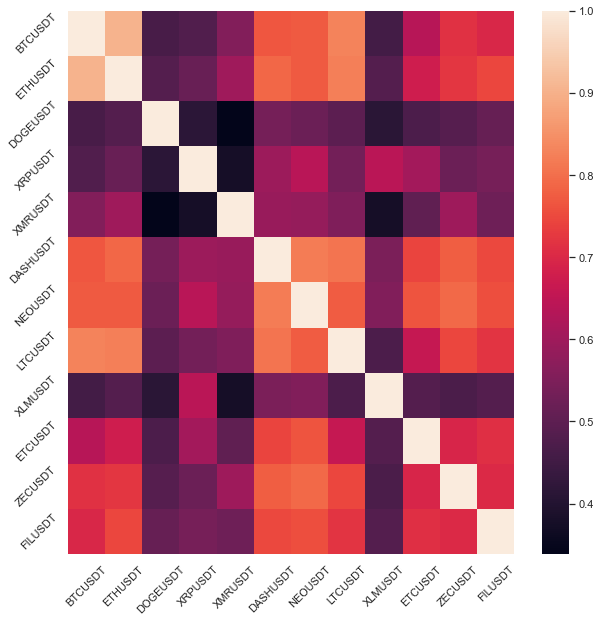

In [24]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(logretdf[['BTCUSDT','ETHUSDT','DOGEUSDT','XRPUSDT','XMRUSDT','DASHUSDT','NEOUSDT','LTCUSDT',
         'XLMUSDT','ETCUSDT','ZECUSDT','FILUSDT']].corr())
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [25]:
corr_df = logretdf.corr()
corr_df.filter(non_lev,axis=1)

,BTCUSDT,ETHUSDT,NEOUSDT,LTCUSDT,XRPUSDT,XLMUSDT,ETCUSDT,XMRUSDT,ZECUSDT,DASHUSDT,DOGEUSDT,FILUSDT
BTCUSDT,1.000000,0.904137,0.770101,0.827372,0.479250,0.455317,0.637508,0.556267,0.715532,0.765724,0.464592,0.697182
ETHUSDT,0.904137,1.000000,0.772080,0.822262,0.515702,0.485519,0.676241,0.600422,0.722576,0.789573,0.484669,0.744216
DOGEUSDT,0.464592,0.484669,0.519523,0.496378,0.413985,0.413059,0.471802,0.338425,0.486732,0.536490,1.000000,0.511808
XRPUSDT,0.479250,0.515702,0.638629,0.533592,1.000000,0.641838,0.605405,0.375205,0.521298,0.596417,0.413985,0.538064
XMRUSDT,0.556267,0.600422,0.585082,0.551850,0.375205,0.376386,0.503037,1.000000,0.599190,0.591607,0.338425,0.524952
DASHUSDT,0.765724,0.789573,0.818535,0.808174,0.596417,0.547098,0.743241,0.591607,0.777209,1.000000,0.536490,0.748441
NEOUSDT,0.770101,0.772080,1.000000,0.775092,0.638629,0.554773,0.763780,0.585082,0.791603,0.818535,0.519523,0.754701
LTCUSDT,0.827372,0.822262,0.775092,1.000000,0.533592,0.471071,0.661310,0.551850,0.745944,0.808174,0.496378,0.720411
XLMUSDT,0.455317,0.485519,0.554773,0.471071,0.641838,1.000000,0.483281,0.376386,0.468253,0.547098,0.413059,0.483468
ETCUSDT,0.637508,0.676241,0.763780,0.661310,0.605405,0.483281,1.000000,0.503037,0.694109,0.743241,0.471802,0.710693


In [26]:
stacked = corr_df.filter(non_lev, axis=1).filter(non_lev,axis=0)

In [27]:
unstacked=stacked.unstack()
unstacked.drop_duplicates()

BTCUSDT   BTCUSDT     1.000000
          ETHUSDT     0.904137
          NEOUSDT     0.770101
          LTCUSDT     0.827372
          XRPUSDT     0.479250
                        ...   
ZECUSDT   DOGEUSDT    0.486732
          FILUSDT     0.702765
DASHUSDT  DOGEUSDT    0.536490
          FILUSDT     0.748441
DOGEUSDT  FILUSDT     0.511808
Length: 67, dtype: float64

In [28]:
unstacked[unstacked < 1].nlargest(20)

BTCUSDT   ETHUSDT     0.904137
ETHUSDT   BTCUSDT     0.904137
BTCUSDT   LTCUSDT     0.827372
LTCUSDT   BTCUSDT     0.827372
ETHUSDT   LTCUSDT     0.822262
LTCUSDT   ETHUSDT     0.822262
NEOUSDT   DASHUSDT    0.818535
DASHUSDT  NEOUSDT     0.818535
LTCUSDT   DASHUSDT    0.808174
DASHUSDT  LTCUSDT     0.808174
NEOUSDT   ZECUSDT     0.791603
ZECUSDT   NEOUSDT     0.791603
ETHUSDT   DASHUSDT    0.789573
DASHUSDT  ETHUSDT     0.789573
ZECUSDT   DASHUSDT    0.777209
DASHUSDT  ZECUSDT     0.777209
NEOUSDT   LTCUSDT     0.775092
LTCUSDT   NEOUSDT     0.775092
ETHUSDT   NEOUSDT     0.772080
NEOUSDT   ETHUSDT     0.772080
dtype: float64